In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.metrics import MeanSquaredError
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

ModuleNotFoundError: No module named 'tensorflow.keras.wrappers'

# Career Per Game DF

In [3]:
# Read in nhl_career_per_game df from main Capstone Notebook
nhl_career_per_game = pd.read_csv("C:/Users/joshm/Documents/BrainStation/nhl_career_per_game.csv", index_col=0)
nhl_career_per_game

,GP,TOI/GP,G/60,A/60,G/GP,A/GP,PTS/GP,Shots/GP,PPG/GP,PPA/GP,EvnG/GP,EvnA/GP
Player,,,,,,,,,,,,
A.J. Greer,93,8.34,0.46,0.85,0.06,0.12,0.18,0.95,0.00,0.00,0.06,0.12
Aaron Downey,119,5.02,0.40,0.70,0.03,0.06,0.09,0.39,0.00,0.00,0.03,0.06
Aaron Ekblad,625,23.00,0.46,0.91,0.18,0.35,0.53,2.54,0.06,0.11,0.11,0.24
Aaron Gagnon,19,8.05,0.00,0.78,0.00,0.11,0.11,0.47,0.00,0.00,0.00,0.11
Aaron Johnson,252,14.54,0.25,0.64,0.06,0.15,0.21,0.88,0.01,0.02,0.05,0.13
...,...,...,...,...,...,...,...,...,...,...,...,...
Éric Gélinas,188,15.35,0.29,0.85,0.07,0.22,0.29,1.70,0.05,0.11,0.03,0.11
Éric Perrin,241,16.37,0.49,1.10,0.13,0.30,0.43,1.58,0.02,0.04,0.10,0.20
Ľubomír Višňovský,615,22.59,0.44,1.21,0.16,0.46,0.62,1.84,0.07,0.25,0.10,0.20


In [4]:
nhl_career_per_game['GP']

Player
A.J. Greer            93
Aaron Downey         119
Aaron Ekblad         625
Aaron Gagnon          19
Aaron Johnson        252
                    ... 
Éric Gélinas         188
Éric Perrin          241
Ľubomír Višňovský    615
Štefan Ružička        40
Žigmund Pálffy        42
Name: GP, Length: 2396, dtype: int64

In [7]:
df = nhl_career_per_game[nhl_career_per_game['GP'] >= 25]
df.sort_values(by='GP', ascending=False)

,GP,TOI/GP,G/60,A/60,G/GP,A/GP,PTS/GP,Shots/GP,PPG/GP,PPA/GP,EvnG/GP,EvnA/GP
Player,,,,,,,,,,,,
Ryan Suter,1362,24.67,0.18,1.00,0.08,0.41,0.49,1.66,0.03,0.16,0.05,0.24
Alex Ovechkin,1347,20.83,1.76,1.42,0.61,0.49,1.10,4.72,0.22,0.19,0.38,0.30
Brent Burns,1297,22.76,0.50,1.20,0.19,0.45,0.64,2.82,0.06,0.16,0.12,0.28
Anže Kopitar,1292,20.98,0.87,1.66,0.30,0.58,0.88,2.40,0.09,0.22,0.21,0.35
Phil Kessel,1286,17.70,1.09,1.53,0.32,0.45,0.77,2.99,0.09,0.17,0.23,0.28
...,...,...,...,...,...,...,...,...,...,...,...,...
Ryan Stoa,25,13.36,0.36,0.36,0.08,0.08,0.16,1.80,0.00,0.08,0.08,0.00
Mason Geertsen,25,6.96,0.00,0.00,0.00,0.00,0.00,0.48,0.00,0.00,0.00,0.00
Egor Yakovlev,25,15.68,0.31,0.77,0.08,0.20,0.28,0.96,0.00,0.00,0.08,0.20


In [8]:
df['GP'].value_counts()

GP
27      15
47      15
41      15
39      14
43      13
        ..
851      1
1047     1
739      1
679      1
1211     1
Name: count, Length: 787, dtype: int64

## Train/Test Split

In [10]:
# allocating X and y variables
y = nhl_career_per_game['G/GP']
X = nhl_career_per_game.drop(columns=['GP', 'G/GP']) # every column except 'G'

# Split the data into train &  test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [12]:
# Instantiate a Feed Forward neural network
nhl_nn_model = Sequential()

# dense layers
nhl_nn_model.add(tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)))
nhl_nn_model.add(Dense(40, activation='relu'))
nhl_nn_model.add(Dense(30, activation='relu'))
nhl_nn_model.add(Dense(20, activation='relu'))
nhl_nn_model.add(Dense(10, activation='relu'))

# Single node output as this is regression
nhl_nn_model.add(Dense(1)) # Default activation is linear

# Compile the model
nhl_nn_model.compile(optimizer=tf.keras.optimizers.Adam(),
             loss=tf.keras.losses.MeanSquaredError(), # MSE loss function
             metrics=[MeanSquaredError()]) # MSE evaluation metric

In [58]:
# # instantiating the pipeline
# from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
# from sklearn.pipeline import Pipeline
# from sklearn.decomposition import PCA
# from sklearn.model_selection import cross_val_score

# estimators = [('scaler', StandardScaler()),
#               ('PCA', PCA()),
#              ('nhl_nn_model', KerasRegressor(build_fn=create_model, verbose=0))]

# per_game_pipe = Pipeline(estimators, verbose=True)

In [22]:
# from sklearn.model_selection import GridSearchCV

# params = {'scaler': [StandardScaler()], 
#           'PCA__n_components': [1, 2, 3, 4, 5, 6]}

# per_game_pipe_grid = GridSearchCV(per_game_pipe, param_grid=params)

In [60]:
# avg_val_score = np.mean(cross_val_score(per_game_pipe_grid, X_train, y_train, cv=5))
# avg_val_score

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing PCA, total=   0.0s
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing PCA, total=   0.0s
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing PCA, total=   0.0s
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing PCA, total=   0.0s
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing PCA, total=   0.0s
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing PCA, total=   0.0s
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing PCA, total=   0.0s
[Pipel

-4.662208563611243

In [24]:
# # Fitting the pipline to train data

# per_game_pipe_grid.fit(X_train, y_train)

# print(f'Train score: {per_game_pipe_grid.score(X_train, y_train)}')
# print(f'Test score: {per_game_pipe_grid.score(X_test, y_test)}')

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing PCA, total=   0.0s
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing PCA, total=   0.0s
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing PCA, total=   0.0s
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing PCA, total=   0.0s
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing PCA, total=   0.0s
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing PCA, total=   0.0s
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing PCA, total=   0.0s
[Pipel

### Fitting NN

In [13]:
# Training for 20 epochs
history = nhl_nn_model.fit(X_train, y_train, epochs=20, verbose=True)

# Grab the prediction data
y_pred = nhl_nn_model.predict(X_test)

# empty list to accept loss values over epochs
mse_list = []

# append loss values to list
mse_list = mse_list + history.history['mean_squared_error']

Epoch 1/20
53/53 [==============================] - 1s 926us/step - loss: 0.2620 - mean_squared_error: 0.2620
Epoch 2/20
53/53 [==============================] - 0s 899us/step - loss: 0.0042 - mean_squared_error: 0.0042
Epoch 3/20
53/53 [==============================] - 0s 937us/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 4/20
53/53 [==============================] - 0s 954us/step - loss: 5.2089e-04 - mean_squared_error: 5.2089e-04
Epoch 5/20
53/53 [==============================] - 0s 947us/step - loss: 4.3620e-04 - mean_squared_error: 4.3620e-04
Epoch 6/20
53/53 [==============================] - 0s 915us/step - loss: 4.1566e-04 - mean_squared_error: 4.1566e-04
Epoch 7/20
53/53 [==============================] - 0s 937us/step - loss: 3.8638e-04 - mean_squared_error: 3.8638e-04
Epoch 8/20
53/53 [==============================] - 0s 1ms/step - loss: 3.6270e-04 - mean_squared_error: 3.6270e-04
Epoch 9/20
53/53 [==============================] - 0s 925us/step - loss: 3.3548e-

### Calculating MSE and RMSE

In [14]:
print(y_test.shape)
y_pred = y_pred.reshape((719,))
print(y_pred.shape)

(719,)
(719,)


In [15]:
mse = np.mean(np.square(y_test - y_pred))
mse

0.00011698594907171928

In [16]:
# Compute the root mean squared error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 0.01081600430250096


This is the root mean squared error for actual G/GP values vs the predicted G/GP (test set)

#### Calculating r squared values for NN model

In [18]:
from sklearn.metrics import r2_score

y_train_pred = nhl_nn_model.predict(X_train)

r2_train = r2_score(y_train, y_train_pred)

r2_test = r2_score(y_test, y_pred)

# Compute the number of observations (n) and number of predictors (p)
n = len(y_test)
p = X_train.shape[1]  # Assuming X is your feature matrix with shape (n_samples, n_features)

# Compute the adjusted R-squared
adjusted_r2 = 1 - (1 - r2_test) * (n - 1) / (n - p - 1)

print("r2 train", r2_train)
print("r2 test", r2_test)
print("Adjusted R-squared:", adjusted_r2)

53/53 [==============================] - 0s 655us/step
r2 train 0.9880433476713143
r2 test 0.9875004979535728
Adjusted R-squared: 0.9873239513144989


In [19]:
X_train.shape[1]

10

#### Updating metrics table

In [20]:
df_scores = pd.read_csv("C:/Users/joshm/Documents/BrainStation/df_scores.csv", index_col=0)
df_scores

,Train Set Score,Test Set Score,Adjusted Rsquared,RMSE
Career Totals,0.968,0.969,0.968,13.076
Career Totals w/ manual feature reduction,0.766,0.688,0.685,41.551
Per Game w/ all features,0.998,0.998,0.998,0.004
Per Game w/ Pipeline & GridSearch,0.983,0.981,0.981,0.013
3 Year Weighted Avg w/ Pipeline & GridSearch,0.981,0.968,0.967,0.020
KNN model w/ StandardScaler (3 yr dataset),1.000,0.931,-15.553,0.450


In [21]:
# # Updating a column name....actually not necessary - I'll keep the Model/Specifications as the row index 
# df_scores = df_scores.rename(columns={'Unnamed: 0': 'Model & Specifications'})
# df_scores

In [68]:
df_scores.loc['Neural Network - Per Game Dataset', 'Train Set Score'] = round(r2_train, 3)
df_scores.loc['Neural Network - Per Game Dataset', 'Test Set Score'] = round(r2_test, 3)
df_scores.loc['Neural Network - Per Game Dataset', 'Adjusted Rsquared'] = round(adjusted_r2, 3)
df_scores.loc['Neural Network - Per Game Dataset', 'RMSE'] = round(np.sqrt(mse), 3)
df_scores

,Train Set Score,Test Set Score,Adjusted Rsquared,RMSE
Career Totals,0.968,0.969,0.968,13.076
Career Totals w/ manual feature reduction,0.766,0.688,0.685,41.551
Per Game w/ all features,0.998,0.998,0.998,0.004
Per Game w/ Pipeline & GridSearch,0.983,0.981,0.981,0.013
3 Year Weighted Avg w/ Pipeline & GridSearch,0.981,0.968,0.967,0.020
KNN model w/ StandardScaler (3 yr dataset),1.000,0.931,-15.553,0.450
Neural Network - Per Game Dataset,0.982,0.974,0.973,0.018


### Plotting loss

KeyError: 'val_loss'

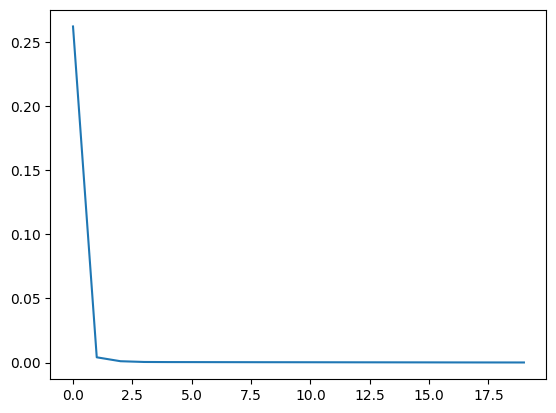

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [24]:
# loss and mse metrics
nhl_nn_model.evaluate(X_test, y_test, verbose=0)

[0.00011698593880282715, 0.00011698593880282715]

In [25]:
len(mse_list)

20

### Plotting MSE vs Epochs

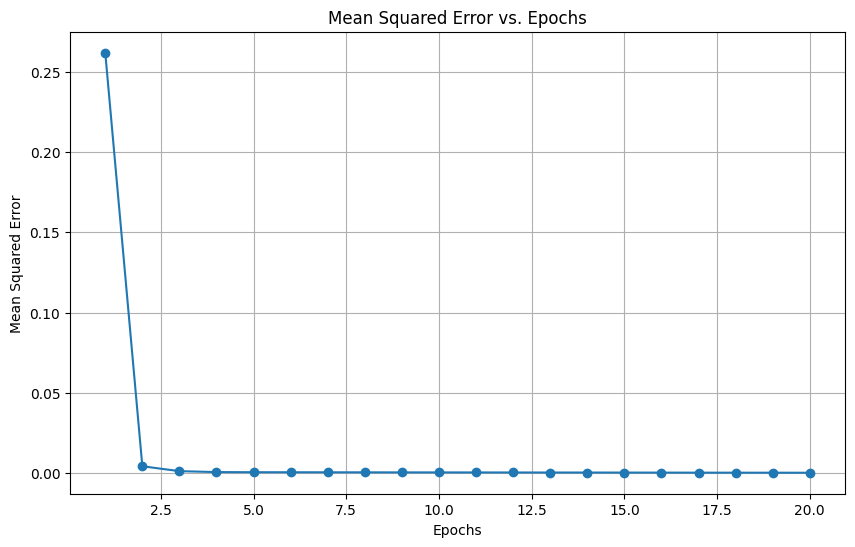

In [26]:
mse_values = [...]  # Replace [...] with your actual MSE values

# Generate epochs (assuming starting from epoch 1)
epochs = range(1, len(mse_list) + 1)

# Plot the MSE values
plt.figure(figsize=(10, 6))
plt.plot(epochs, mse_list, marker='o', linestyle='-')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error vs. Epochs')
plt.grid(True)
plt.show()

In [27]:
type(y_train)

pandas.core.series.Series

In [28]:
type(X_train)

pandas.core.frame.DataFrame

In [29]:
# converting X_train into a numpy array for fitting the NN model
X_train_array = X_train.values
type(X_train_array)

numpy.ndarray

In [30]:
y_pred.shape

(719,)

### Plotting G/GP against all independent features (Predicted and Actual) 

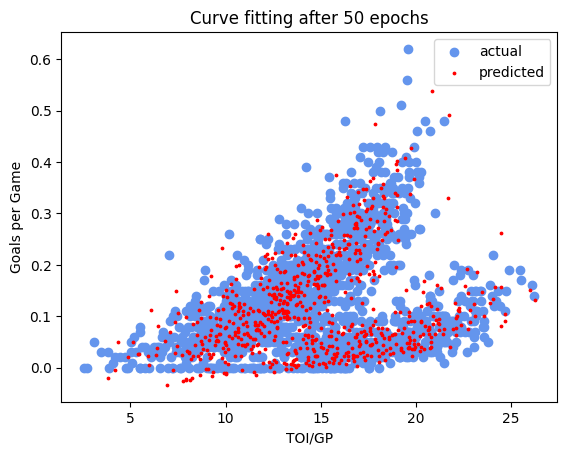

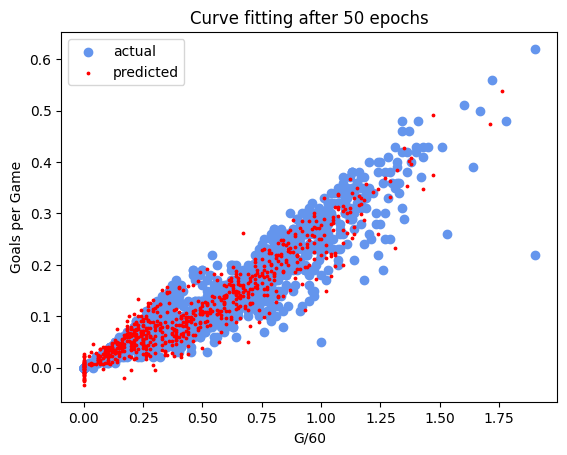

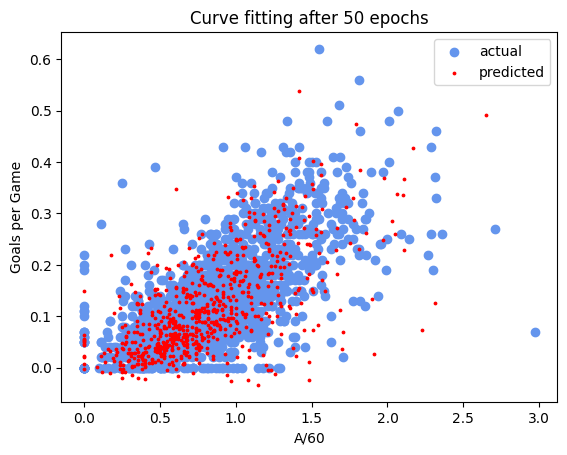

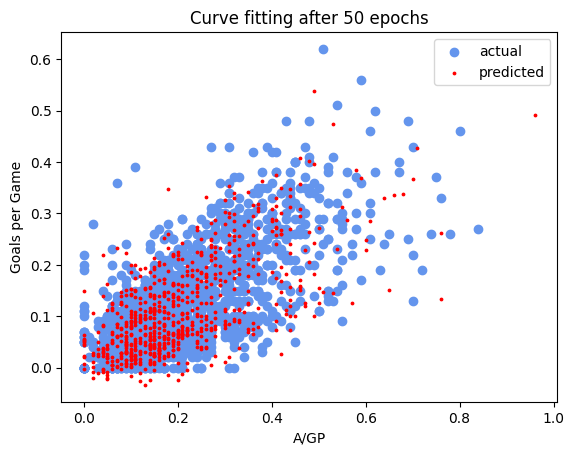

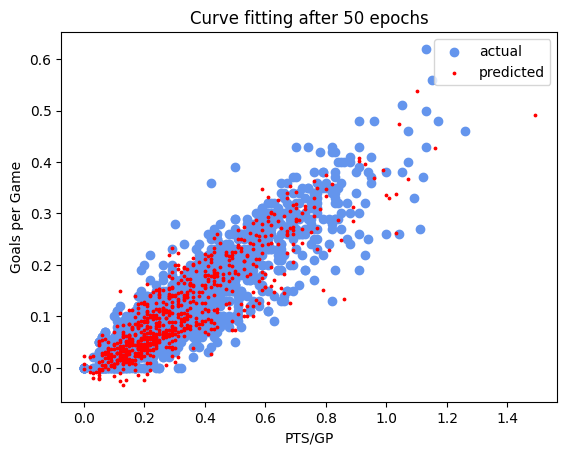

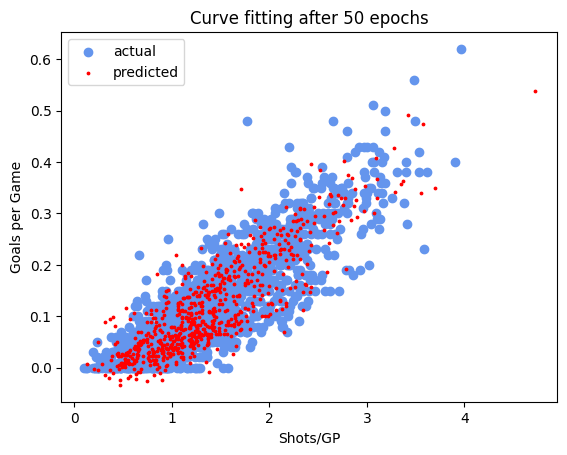

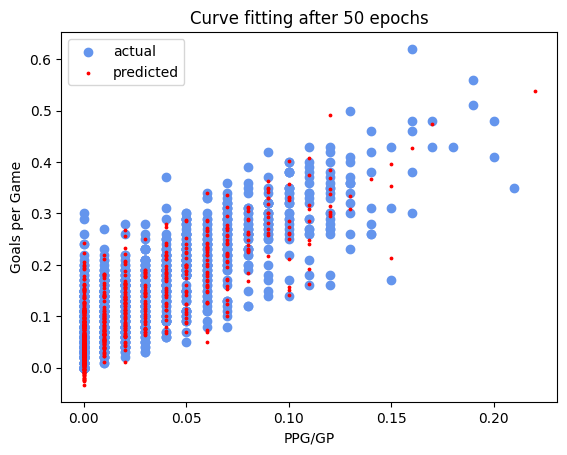

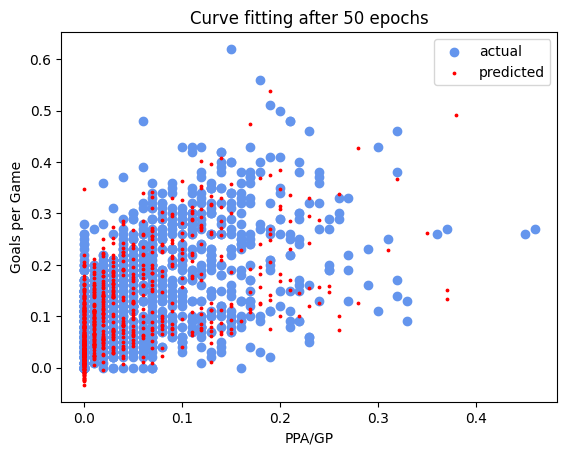

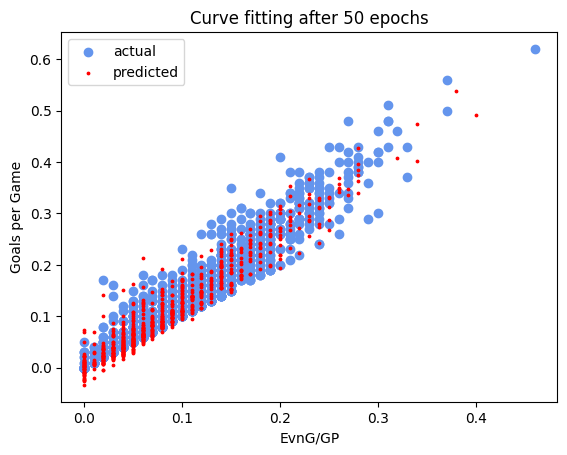

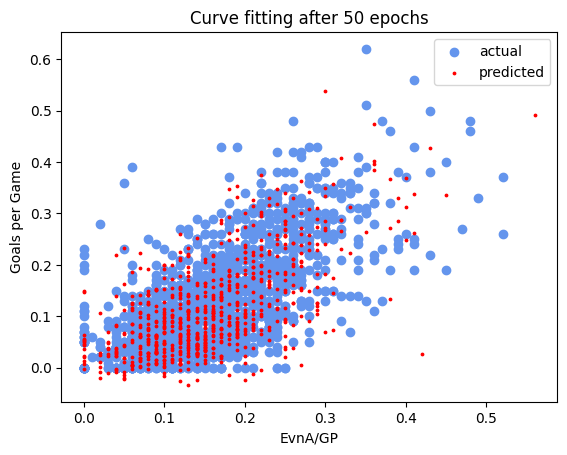

Mean Squared Error (MSE) for 50 epochs:  0.00012398901162669063


In [31]:
# Plotting target feature vs independent features - Actual vs Predicted
for col in X_train.columns:
    # Plot actual vs. predicted values for each feature
    plt.figure()
    plt.scatter(X_train[col], y_train, label='actual', c="cornflowerblue")  # Plot the actual data
    plt.scatter(X_test[col], y_pred, s=3, color='r', label='predicted')  # Plot the predicted values
    plt.legend()
    plt.xlabel(col)
    plt.ylabel('Goals per Game')
    plt.title(f'Curve fitting after 50 epochs')
    plt.show()

# Error for the one epoch
print('Mean Squared Error (MSE) for 50 epochs: ', mse_list[-1])

In [32]:
X_test.shape

(719, 10)

In [33]:
y_pred.shape

(719,)

In [34]:
X_train_array.shape

(1677, 10)

In [35]:
X_test['TOI/GP']

Player
Drew Larman           7.38
Chris Wideman        13.88
Victor Rask          14.97
Jan Hlaváč           15.15
Teemu Hartikainen    11.60
                     ...  
Peter Cehlárik       12.60
Elias Pettersson     18.98
Lasse Pirjetä         9.24
Nikita Soshnikov     10.89
Saku Mäenalanen      10.02
Name: TOI/GP, Length: 719, dtype: float64

In [36]:
X_test.columns

Index(['TOI/GP', 'G/60', 'A/60', 'A/GP', 'PTS/GP', 'Shots/GP', 'PPG/GP',
       'PPA/GP', 'EvnG/GP', 'EvnA/GP'],
      dtype='object')

#### Plotting same thing as above...

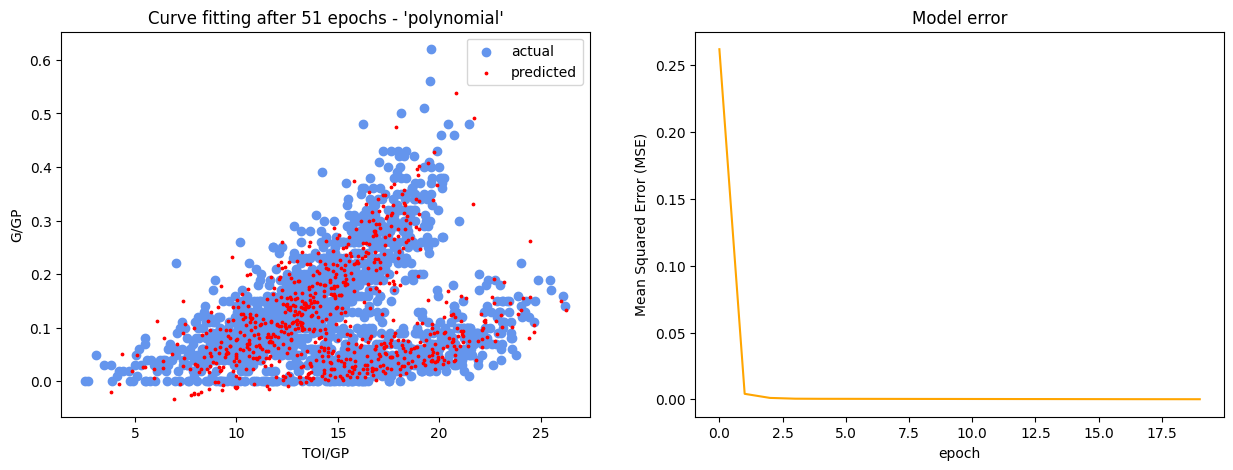

Mean Squared Error (MAE) after 51 epochs:  0.00012398901162669063


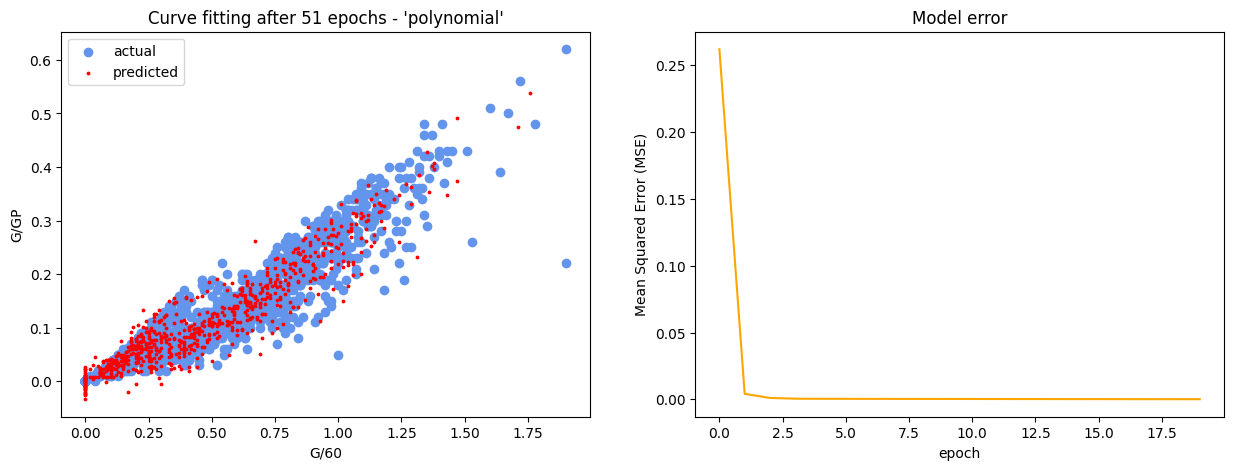

Mean Squared Error (MAE) after 51 epochs:  0.00012398901162669063


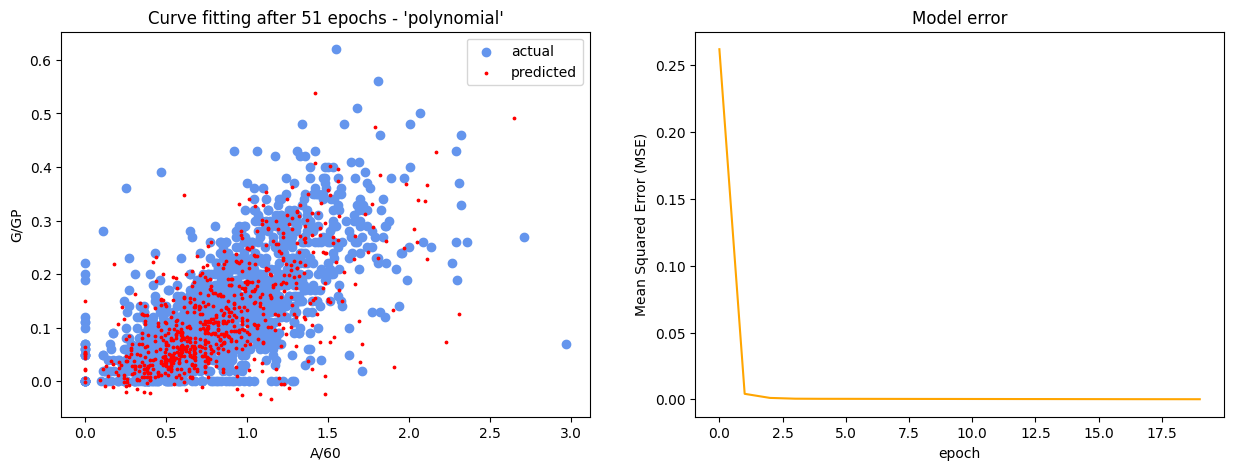

Mean Squared Error (MAE) after 51 epochs:  0.00012398901162669063


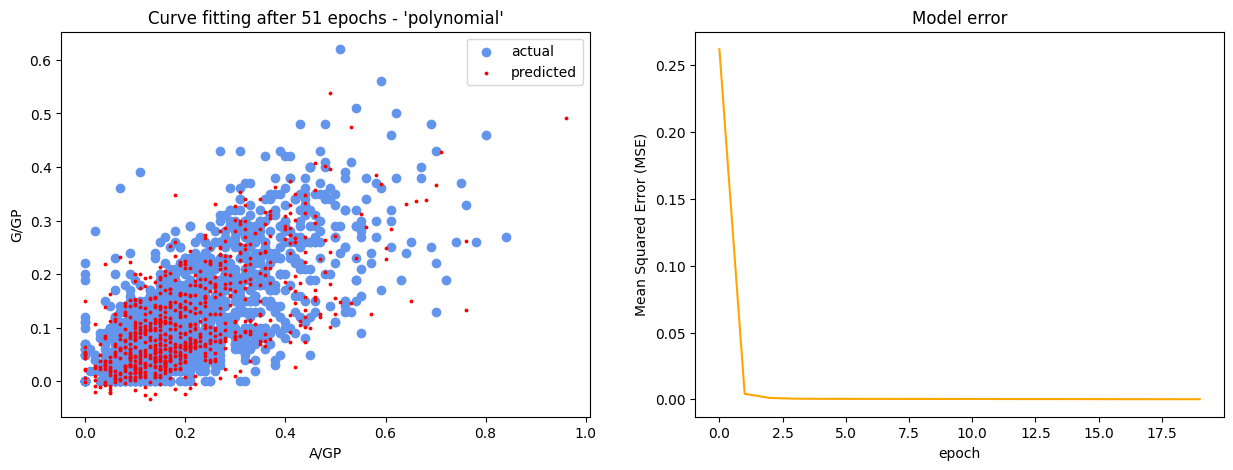

Mean Squared Error (MAE) after 51 epochs:  0.00012398901162669063


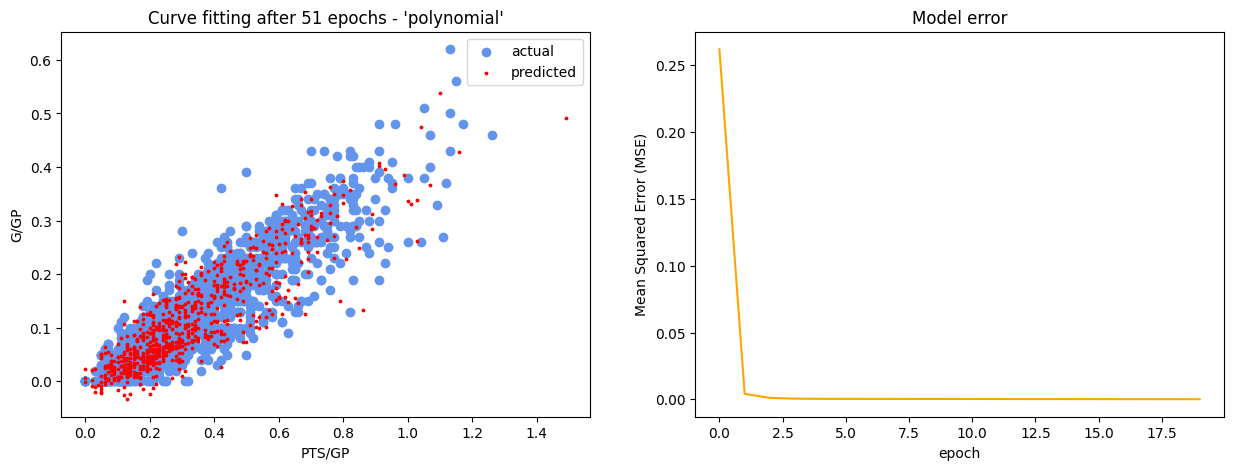

Mean Squared Error (MAE) after 51 epochs:  0.00012398901162669063


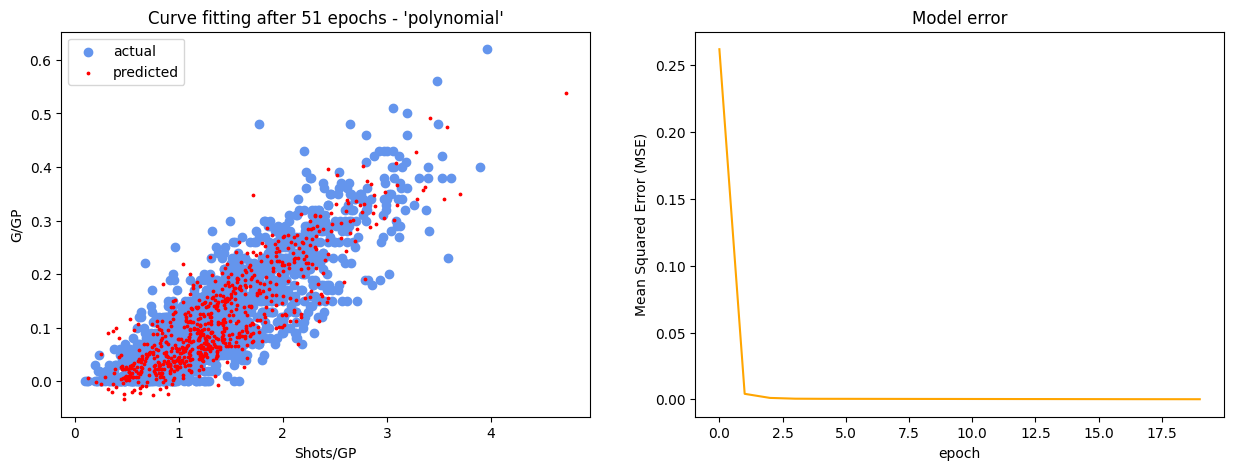

Mean Squared Error (MAE) after 51 epochs:  0.00012398901162669063


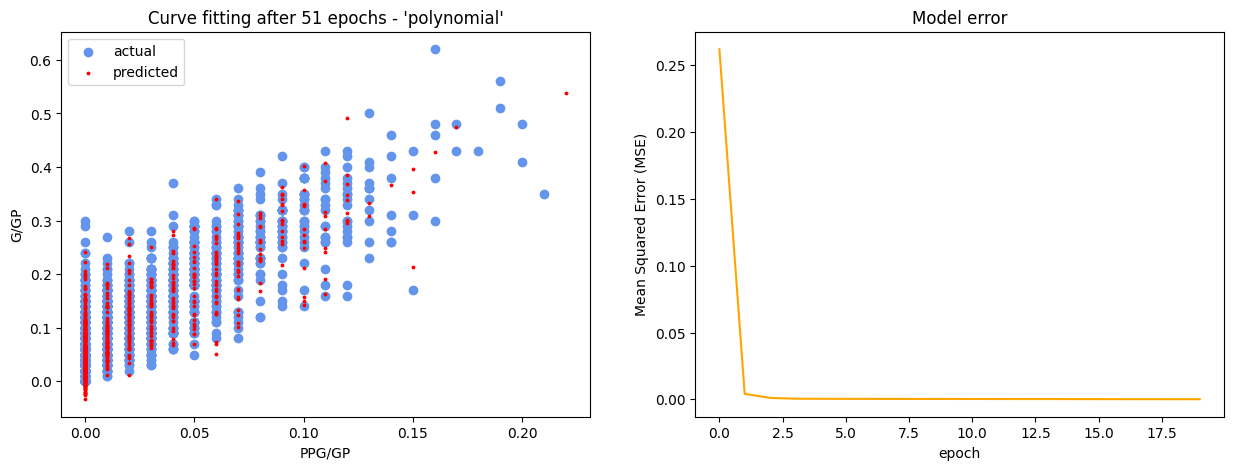

Mean Squared Error (MAE) after 51 epochs:  0.00012398901162669063


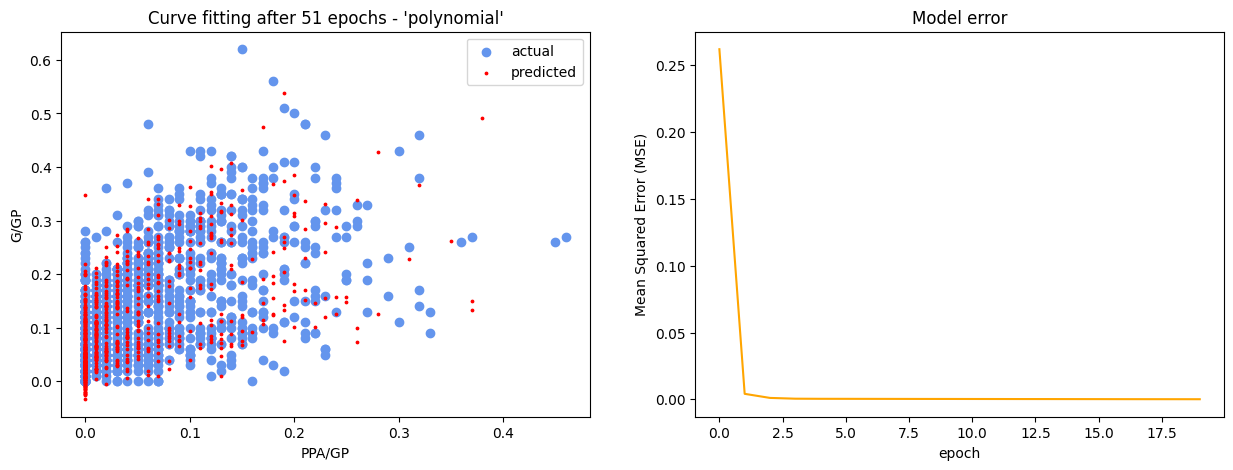

Mean Squared Error (MAE) after 51 epochs:  0.00012398901162669063


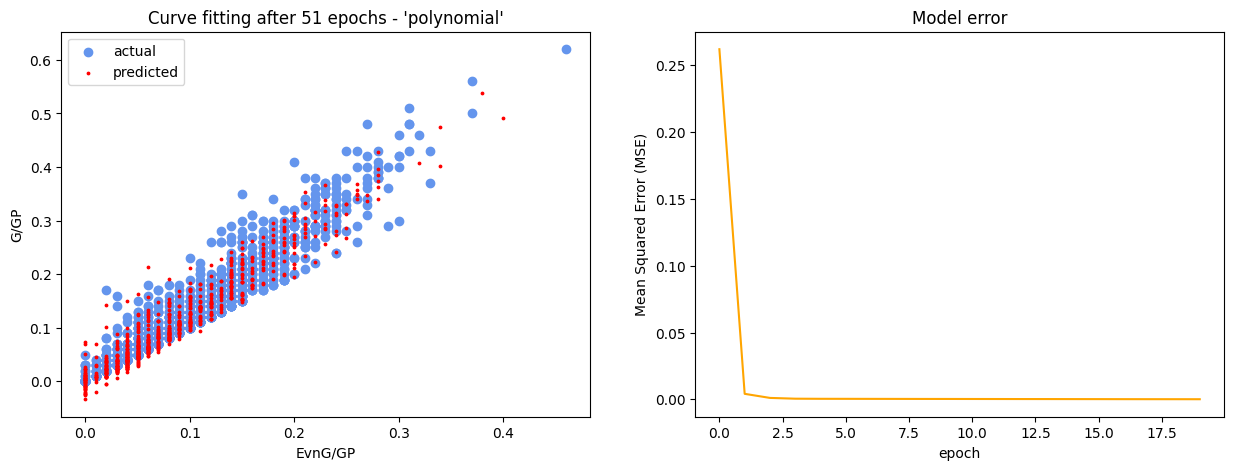

Mean Squared Error (MAE) after 51 epochs:  0.00012398901162669063


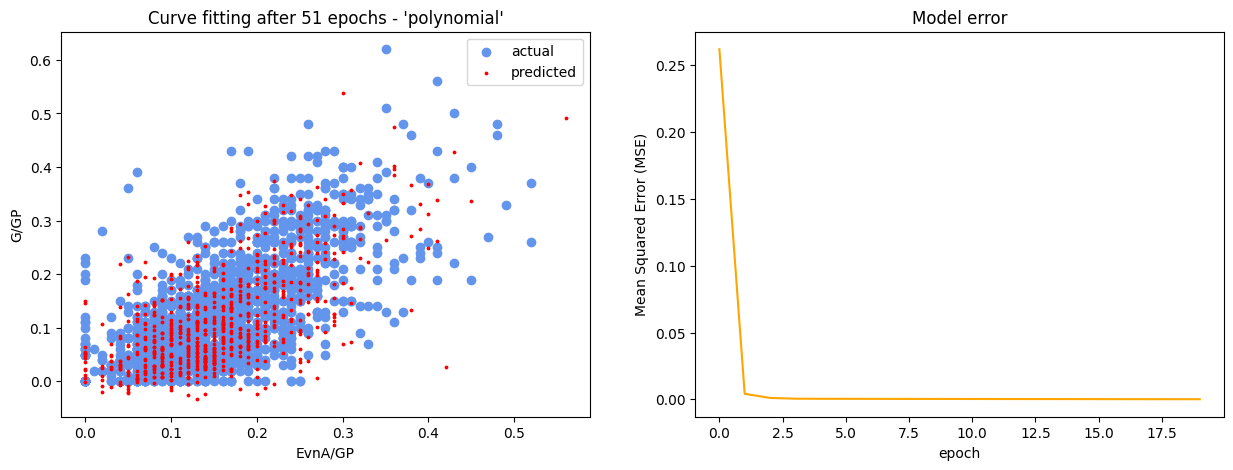

Mean Squared Error (MAE) after 51 epochs:  0.00012398901162669063


In [37]:
for col in X_test.columns:
    plt.subplots(1,2, figsize=(15,5))
    
    plt.subplot(1,2,1)
    plt.scatter(X_train[col], y_train, label='actual', c="cornflowerblue") # Plot the actual data
    plt.scatter(X_test[col], y_pred, s=3, color='r', label='predicted') # Plot the predictions
    plt.legend()
    plt.xlabel(col)
    plt.ylabel('G/GP')
    plt.title("Curve fitting after 51 epochs - 'polynomial'")
    
    # Error for each epoch
    plt.subplot(1,2,2)
    plt.plot(mse_list, c='orange')
    plt.title('Model error')
    plt.xlabel('epoch')
    plt.ylabel('Mean Squared Error (MSE)')
    
    # Show
    plt.show()
    
    # Error for the one epoch
    print('Mean Squared Error (MAE) after 51 epochs: ', history.history['mean_squared_error'][-1])

### Visualizing Predicted vs Actual for test set

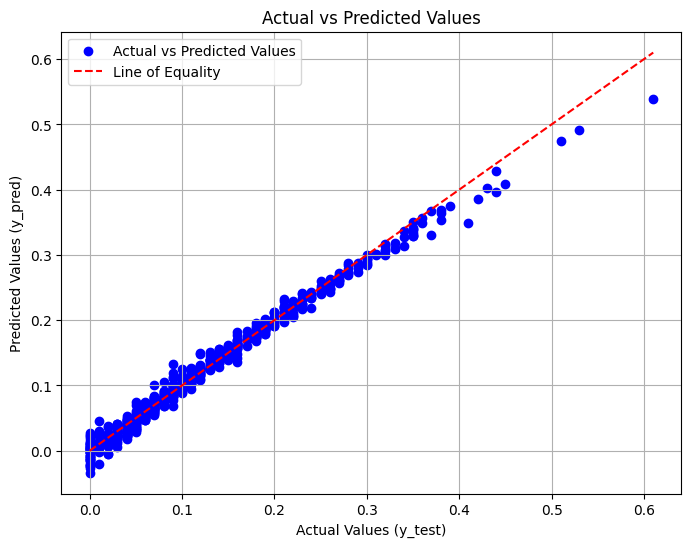

In [38]:
# Plot y_pred vs y_test
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Line of Equality')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

Plotly/plotly.graph_objects is not working in this environment. Moving along for now

In [39]:
# # Create a DataFrame with y_test and y_pred
# import plotly.express as px 
# import plotly.graph_objects as go
# df = pd.DataFrame({'actual goals/game': y_test, 'predicted goals/game': y_pred})

# # Plot y_test vs y_pred
# fig = px.scatter(df, x='actual goals/game', y='predicted goals/game', title='Actual vs Predicted Values', height=900, hover_name=y_test.index)
# fig.add_trace(go.Scatter(x=[df['actual goals/game'].min(), df['actual goals/game'].max()], y=[df['actual goals/game'].min(), df['actual goals/game'].max()], mode='lines', name='Perfect Prediction'))
# fig.show()

### Creating a table including Difference between Predicted and Actual 

In [40]:
y_pred.shape

(719,)

In [41]:
# y_pred must have shape (741,)
df = pd.DataFrame({'actual goals/game': y_test, 'predicted goals/game': y_pred})
df

,actual goals/game,predicted goals/game
Player,,
Drew Larman,0.12,0.149474
Chris Wideman,0.07,0.073990
Victor Rask,0.18,0.178825
Jan Hlaváč,0.15,0.161188
Teemu Hartikainen,0.08,0.073675
...,...,...
Peter Cehlárik,0.20,0.199796
Elias Pettersson,0.42,0.385276
Lasse Pirjetä,0.16,0.177694


In [42]:
df['Actual Goals'] = round((df['actual goals/game'] * 82), 2)
df['Predicted Goals'] = round((df['predicted goals/game'] * 82), 2)
df['Difference(Actual - Predicted)'] = df['Actual Goals'] - df['Predicted Goals']
df.sort_values(by='Actual Goals', ascending=False).head(20)

,actual goals/game,predicted goals/game,Actual Goals,Predicted Goals,Difference(Actual - Predicted)
Player,,,,,
Alex Ovechkin,0.61,0.538289,50.02,44.139999,5.880001
Connor McDavid,0.53,0.491104,43.46,40.270000,3.190000
David Pastrňák,0.51,0.474556,41.82,38.910000,2.910000
Kyle Connor,0.45,0.408023,36.90,33.459999,3.440001
Brayden Point,0.44,0.395854,36.08,32.459999,3.620001
Evgeni Malkin,0.44,0.428059,36.08,35.099998,0.980002
Jake Guentzel,0.43,0.402326,35.26,32.990002,2.269998
Elias Pettersson,0.42,0.385276,34.44,31.590000,2.850000
Rafaël Harvey-Pinard,0.41,0.348499,33.62,28.580000,5.040000


#### Next I want to run predictions on the entire dataset and visualize

In [43]:
y

Player
A.J. Greer           0.06
Aaron Downey         0.03
Aaron Ekblad         0.18
Aaron Gagnon         0.00
Aaron Johnson        0.06
                     ... 
Éric Gélinas         0.07
Éric Perrin          0.13
Ľubomír Višňovský    0.16
Štefan Ružička       0.08
Žigmund Pálffy       0.26
Name: G/GP, Length: 2396, dtype: float64

In [44]:
y_pred_whole

NameError: name 'y_pred_whole' is not defined

In [45]:
mse_list[-1]

0.00012398901162669063

In [46]:
y[1:]

Player
Aaron Downey         0.03
Aaron Ekblad         0.18
Aaron Gagnon         0.00
Aaron Johnson        0.06
Aaron Miller         0.01
                     ... 
Éric Gélinas         0.07
Éric Perrin          0.13
Ľubomír Višňovský    0.16
Štefan Ružička       0.08
Žigmund Pálffy       0.26
Name: G/GP, Length: 2395, dtype: float64

In [47]:
y - y_pred_whole

NameError: name 'y_pred_whole' is not defined

In [48]:
 np.mean(np.square(y - y_pred_whole))

NameError: name 'y_pred_whole' is not defined

In [49]:
y_pred_whole

NameError: name 'y_pred_whole' is not defined

In [50]:
# Predict on the test data
y_pred_whole = nhl_nn_model.predict(X)
y_pred_whole = np.reshape(y_pred_whole, (2396,))


# Calculate mean squared error
mse = MeanSquaredError()
print("Mean Squared Error:", mse)

# # Compute the root mean squared error (RMSE)
# rmse = np.sqrt(mse)
# print("Root Mean Squared Error (RMSE):", rmse)

75/75 [==============================] - 0s 743us/step
Mean Squared Error: MeanSquaredError(name=mean_squared_error,dtype=float32)


# Three year weighted average DataFrame with advanced stats added

In [51]:
three_yr_df = pd.read_csv("C:/Users/joshm/Documents/BrainStation/three_yr_df3.csv", index_col=0)
three_yr_df

,Age,GP,G/GP,A/GP,PTS/GP,PPG/GP,PPA/GP,EvnG/GP,EvnA/GP,G/60,A/60,Shots/GP,TOI/GP
Player,,,,,,,,,,,,,
A.J. Greer,27.0,71.0,0.076108,0.056735,0.168392,0.000000,0.000000,0.000000,0.000000,0.538088,0.643480,1.033804,8.696931
Aaron Ekblad,27.0,167.0,0.234647,0.226428,0.681598,0.103098,0.192882,0.103098,0.192882,0.579647,1.101490,2.983500,24.202235
Aatu Räty,20.0,15.0,0.133000,0.067000,0.200000,0.000000,0.000000,0.000000,0.000000,0.952000,0.476000,1.067000,8.400000
Adam Beckman,21.0,9.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.333000,10.667000
Adam Boqvist,23.0,133.0,0.132637,0.277654,0.477863,0.024167,0.152098,0.024167,0.152098,0.450225,1.156010,1.330284,17.811314
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zachary Jones,23.0,38.0,0.030392,0.105448,0.189814,0.000000,0.018627,0.000000,0.018627,0.117647,0.628892,0.899127,15.360402
Zack Kassian,33.0,136.0,0.066225,0.021408,0.159696,0.011000,0.000000,0.011000,0.000000,0.366010,0.473510,0.687971,10.511833
Zack MacEwen,27.0,165.0,0.053147,0.058114,0.137559,0.000000,0.000000,0.000000,0.000000,0.299608,0.471343,1.162716,10.410333


## Train/Test Split

In [72]:
# allocating X and y variables
y = three_yr_df['G/GP']
X = three_yr_df.drop(columns=['GP', 'G/GP']) # every column except 'G'

# Split the data into train &  test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [73]:
# Instantiate a Feed Forward neural network
three_yr_nn_model = Sequential()

# dense layers
three_yr_nn_model.add(tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)))
three_yr_nn_model.add(Dense(40, activation='relu'))
three_yr_nn_model.add(Dense(30, activation='relu'))
three_yr_nn_model.add(Dense(20, activation='relu'))
three_yr_nn_model.add(Dense(10, activation='relu'))

# Single node output as this is regression
three_yr_nn_model.add(Dense(1)) # Default activation is linear, no need to define any activation function here

# Compile the model
three_yr_nn_model.compile(optimizer=tf.keras.optimizers.Adam(),
             loss=tf.keras.losses.MeanSquaredError(), # MSE loss function
             metrics=[MeanSquaredError()]) # MSE evaluation metric

### Fitting NN

In [74]:
# Training for 50 epochs
history = three_yr_nn_model.fit(X_train, y_train, epochs=20, verbose=True)

# Grab the prediction data
y_pred = three_yr_nn_model.predict(X_test)

# empty list to accept loss values over epochs
mse_list = []

# append loss values to list
mse_list = mse_list + history.history['mean_squared_error']

Epoch 1/20
24/24 [==============================] - 1s 1ms/step - loss: 0.0746 - mean_squared_error: 0.0746
Epoch 2/20
24/24 [==============================] - 0s 894us/step - loss: 0.0136 - mean_squared_error: 0.0136
Epoch 3/20
24/24 [==============================] - 0s 961us/step - loss: 0.0087 - mean_squared_error: 0.0087
Epoch 4/20
24/24 [==============================] - 0s 892us/step - loss: 0.0061 - mean_squared_error: 0.0061
Epoch 5/20
24/24 [==============================] - 0s 853us/step - loss: 0.0037 - mean_squared_error: 0.0037
Epoch 6/20
24/24 [==============================] - 0s 871us/step - loss: 0.0021 - mean_squared_error: 0.0021
Epoch 7/20
24/24 [==============================] - 0s 827us/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 8/20
24/24 [==============================] - 0s 887us/step - loss: 8.5923e-04 - mean_squared_error: 8.5923e-04
Epoch 9/20
24/24 [==============================] - 0s 872us/step - loss: 7.2603e-04 - mean_squared_error: 7.2603e

### Calculating MSE and RMSE

In [75]:
print(y_test.shape)
y_pred = y_pred.reshape((320,))
print(y_pred.shape)

(320,)
(320,)


In [76]:
mse = np.mean(np.square(y_test - y_pred))
mse

0.0002369377868440505

In [77]:
# Compute the root mean squared error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 0.015392783596349638


#### Calculating r squared values for 3 yr NN

In [78]:
y_train_pred = three_yr_nn_model.predict(X_train)

r2_train = r2_score(y_train, y_train_pred)

r2_test = r2_score(y_test, y_pred)

# Compute the number of observations (n) and number of predictors (p)
n = len(y_test)
p = X_train.shape[1]  # Assuming X is your feature matrix with shape (n_samples, n_features)

# Compute the adjusted R-squared
adjusted_r2 = 1 - (1 - r2_test) * (n - 1) / (n - p - 1)

print("r2 train", r2_train)
print("r2 test", r2_test)
print("Adjusted R-squared:", adjusted_r2)

24/24 [==============================] - 0s 939us/step
r2 train 0.9842445826563266
r2 test 0.981333151682811
Adjusted R-squared: 0.9806664785286257


#### Updating metrics table

In [79]:
df_scores.loc['Neural Network - 3 Yr Weighted Dataset', 'Train Set Score'] = round(r2_train, 3)
df_scores.loc['Neural Network - 3 Yr Weighted Dataset', 'Test Set Score'] = round(r2_test, 3)
df_scores.loc['Neural Network - 3 Yr Weighted Dataset', 'Adjusted Rsquared'] = round(adjusted_r2, 3)
df_scores.loc['Neural Network - 3 Yr Weighted Dataset', 'RMSE'] = round(np.sqrt(mse), 3)
df_scores

,Train Set Score,Test Set Score,Adjusted Rsquared,RMSE
Career Totals,0.968,0.969,0.968,13.076
Career Totals w/ manual feature reduction,0.766,0.688,0.685,41.551
Per Game w/ all features,0.998,0.998,0.998,0.004
Per Game w/ Pipeline & GridSearch,0.983,0.981,0.981,0.013
3 Year Weighted Avg w/ Pipeline & GridSearch,0.981,0.968,0.967,0.020
KNN model w/ StandardScaler (3 yr dataset),1.000,0.931,-15.553,0.450
Neural Network - Per Game Dataset,0.982,0.974,0.973,0.018
Neural Network - 3 Yr Weighted Dataset,0.984,0.981,0.981,0.015


### Plotting loss

KeyError: 'val_loss'

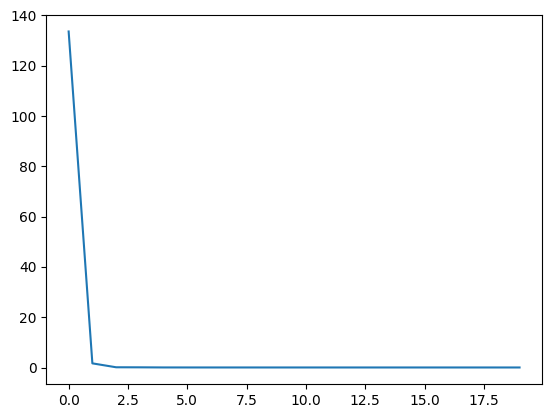

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

### Plotting MSE vs Epochs

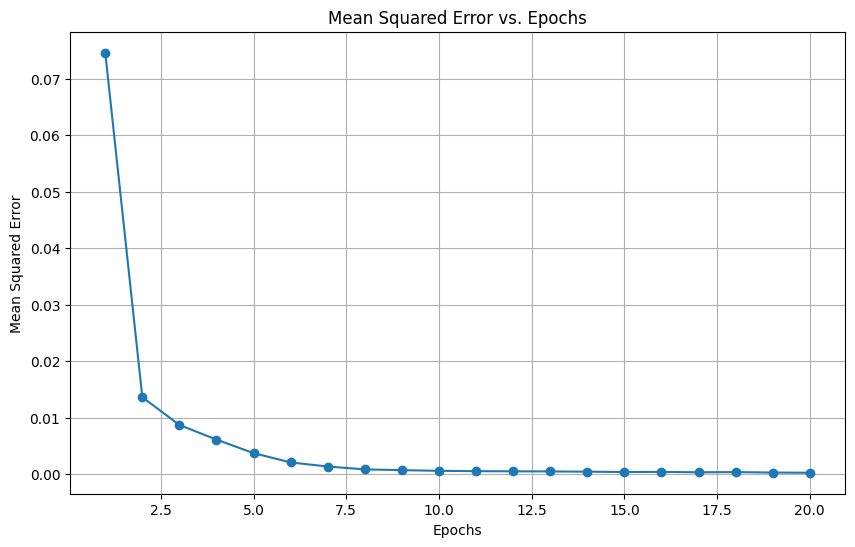

In [80]:
# Generate epochs (assuming starting from epoch 1)
epochs = range(1, len(mse_list) + 1)

# Plot the MSE values
plt.figure(figsize=(10, 6))
plt.plot(epochs, mse_list, marker='o', linestyle='-')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error vs. Epochs')
plt.grid(True)
plt.show()

### Plotting G/GP against all independent features (Predicted and Actual) 

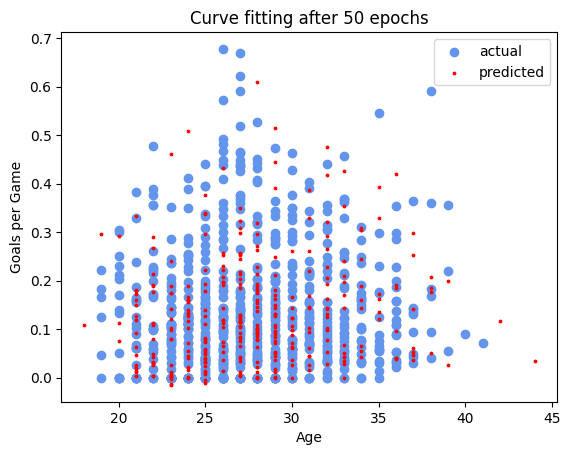

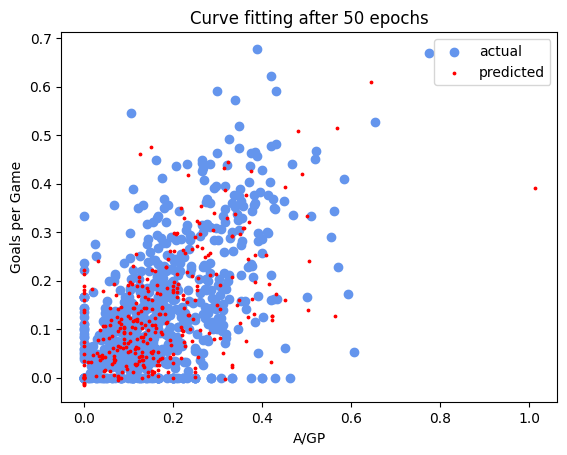

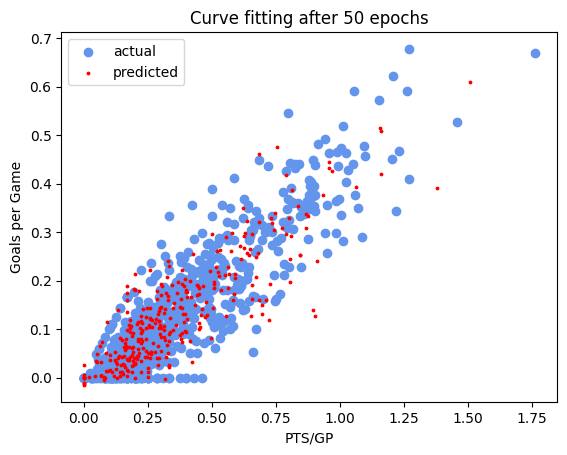

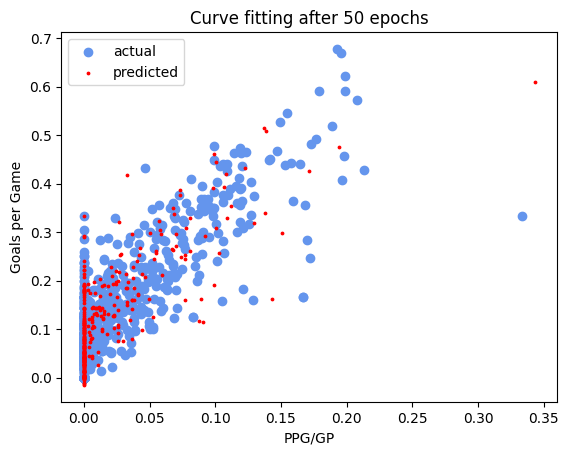

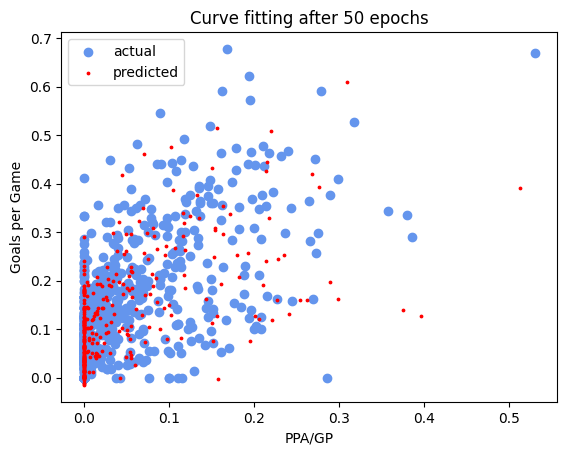

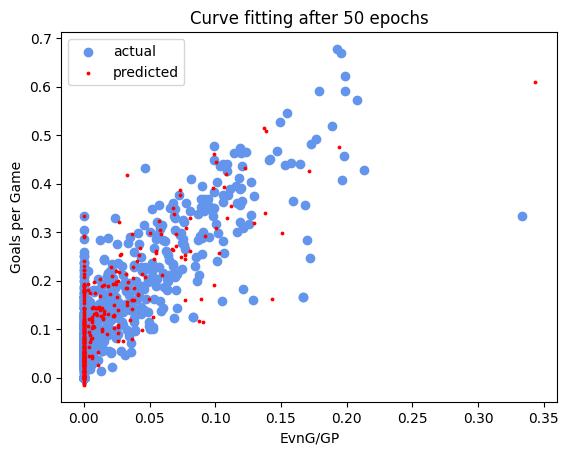

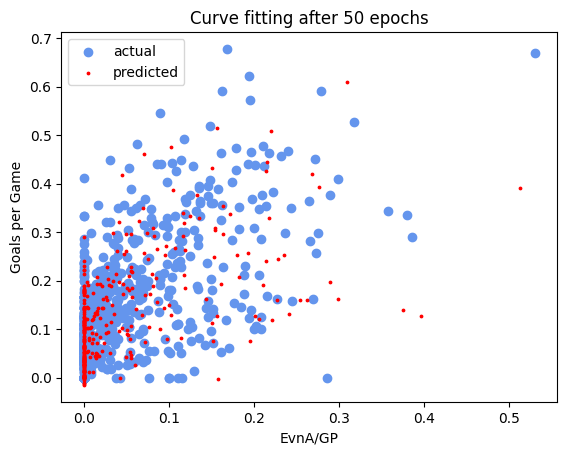

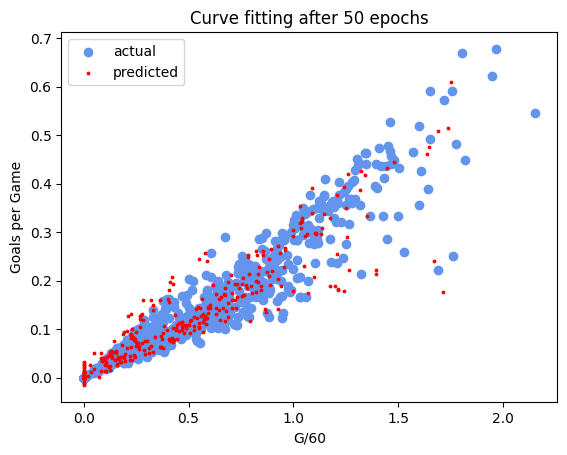

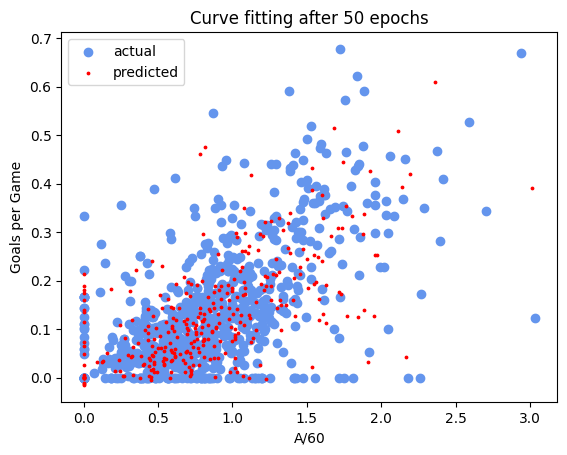

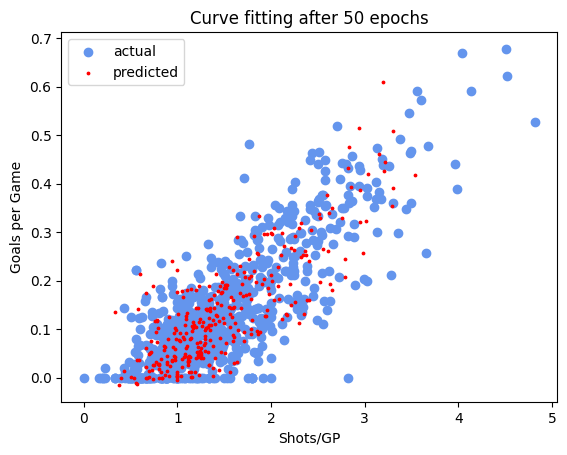

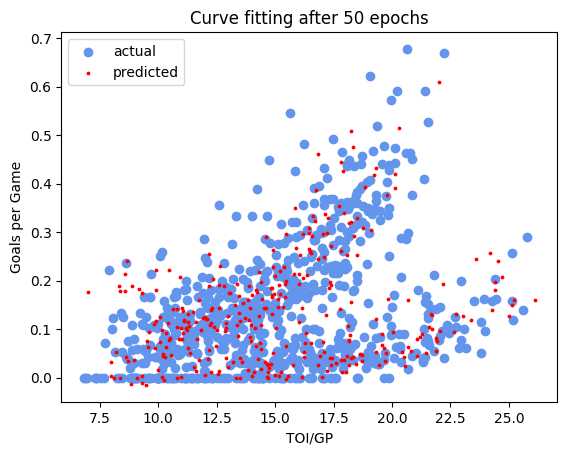

Mean Squared Error (MSE) for 50 epochs:  0.00027044786838814616


In [81]:
# Plotting target feature vs independent features - Actual vs Predicted
for col in X_train.columns:
    # Plot actual vs. predicted values for each feature
    plt.figure()
    plt.scatter(X_train[col], y_train, label='actual', c="cornflowerblue")  # Plot the actual data
    plt.scatter(X_test[col], y_pred, s=3, color='r', label='predicted')  # Plot the predicted values
    plt.legend()
    plt.xlabel(col)
    plt.ylabel('Goals per Game')
    plt.title(f'Curve fitting after 50 epochs')
    plt.show()

# Error for the one epoch
print('Mean Squared Error (MSE) for 50 epochs: ', mse_list[-1])

Calculating MSE and RMSE

### Visualizing Predicted vs Actual for test set

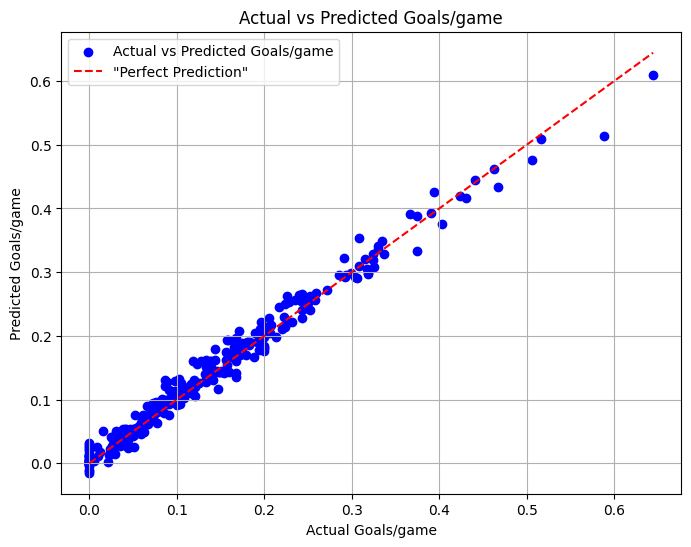

In [84]:
# Plot y_pred vs y_test
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted Goals/game')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='"Perfect Prediction"')
plt.xlabel('Actual Goals/game')
plt.ylabel('Predicted Goals/game')
plt.title('Actual vs Predicted Goals/game')
plt.legend()
plt.grid(True)
plt.show()

### Creating a table including Difference between Predicted and Actual 

In [27]:
# y_pred must have shape (741,)
df2 = pd.DataFrame({'actual goals/game': y_test, 'predicted goals/game': y_pred})
df2

,actual goals/game,predicted goals/game
Player,,
Phil Kessel,0.182029,0.344300
Derek Grant,0.145912,0.201305
Daniel Sprong,0.285451,0.039582
Matt Roy,0.072010,0.153681
Evan Rodrigues,0.226039,0.234691
...,...,...
Travis Konecny,0.360088,0.315217
Alex Iafallo,0.229696,0.199683
Rasmus Kupari,0.077167,0.111257


In [28]:
df2['Actual Goals'] = round((df2['actual goals/game'] * 82), 2)
df2['Predicted Goals'] = round((df2['predicted goals/game'] * 82), 2)
df2['Difference(Actual - Predicted)'] = df2['Actual Goals'] - df2['Predicted Goals']
df2.sort_values(by='Predicted Goals', ascending=False).head(20)

,actual goals/game,predicted goals/game,Actual Goals,Predicted Goals,Difference(Actual - Predicted)
Player,,,,,
Roman Josi,0.256147,0.492084,21.00,40.349998,-19.349998
Jakub Voráček,0.100863,0.446800,8.27,36.639999,-28.369999
Seth Jones,0.119147,0.437563,9.77,35.880001,-26.110001
Alex Chiasson,0.247078,0.434952,20.26,35.669998,-15.409998
Alex DeBrincat,0.437598,0.421591,35.88,34.570000,1.310000
Brady Tkachuk,0.388882,0.396327,31.89,32.500000,-0.610000
Zach Werenski,0.202902,0.393062,16.64,32.230000,-15.590000
Timo Meier,0.440029,0.382170,36.08,31.340000,4.740000
Jake Guentzel,0.473206,0.375014,38.80,30.750000,8.050000


What is going on here?<br>
- Small sample size
- Too many independent features?
- should check correlation heatmap.
- probabaly need scaling and PCA

In [30]:
X.corr()

,Age,A/GP,PTS/GP,PPG/GP,PPA/GP,EvnG/GP,EvnA/GP,G/60,A/60,Shots/GP,...,FF/GP,FA/GP,FF%,SAtt/GP,Thru%,oiSH%,oZS%,dZS%,TK/GP,GV/GP
Age,1.000000,-0.000870,0.022430,0.054787,0.035242,0.054787,0.035242,-0.036343,0.021495,0.039037,...,0.055357,0.020503,0.072330,0.034216,0.036454,0.058858,-0.114164,0.114165,-0.013073,0.016069
A/GP,-0.000870,1.000000,0.916446,0.674428,0.891662,0.674428,0.891662,0.496610,0.926833,0.742919,...,0.642645,0.462429,0.409439,0.748493,0.099495,0.632088,0.526384,-0.526378,0.654593,0.609217
PTS/GP,0.022430,0.916446,1.000000,0.846298,0.863057,0.846298,0.863057,0.763819,0.919048,0.874173,...,0.562225,0.343436,0.445829,0.836211,0.253668,0.643534,0.547702,-0.547695,0.695887,0.536792
PPG/GP,0.054787,0.674428,0.846298,1.000000,0.683618,1.000000,0.683618,0.792185,0.696637,0.787182,...,0.356400,0.171189,0.346930,0.731692,0.267505,0.465005,0.472450,-0.472446,0.503506,0.358177
PPA/GP,0.035242,0.891662,0.863057,0.683618,1.000000,0.683618,1.000000,0.473131,0.834586,0.712093,...,0.576139,0.423580,0.346093,0.730025,0.055871,0.472520,0.542627,-0.542626,0.548906,0.568336
EvnG/GP,0.054787,0.674428,0.846298,1.000000,0.683618,1.000000,0.683618,0.792185,0.696637,0.787182,...,0.356400,0.171189,0.346930,0.731692,0.267505,0.465005,0.472450,-0.472446,0.503506,0.358177
EvnA/GP,0.035242,0.891662,0.863057,0.683618,1.000000,0.683618,1.000000,0.473131,0.834586,0.712093,...,0.576139,0.423580,0.346093,0.730025,0.055871,0.472520,0.542627,-0.542626,0.548906,0.568336
G/60,-0.036343,0.496610,0.763819,0.792185,0.473131,0.792185,0.473131,1.000000,0.611672,0.742368,...,0.092283,-0.134557,0.343603,0.621457,0.516866,0.415619,0.367040,-0.367034,0.491157,0.129604
A/60,0.021495,0.926833,0.919048,0.696637,0.834586,0.696637,0.834586,0.611672,1.000000,0.722722,...,0.452915,0.241688,0.405187,0.684023,0.246419,0.623135,0.549386,-0.549371,0.619513,0.472443
Shots/GP,0.039037,0.742919,0.874173,0.787182,0.712093,0.787182,0.712093,0.742368,0.722722,1.000000,...,0.581732,0.334672,0.501330,0.963894,0.282118,0.478842,0.520293,-0.520289,0.610288,0.492283


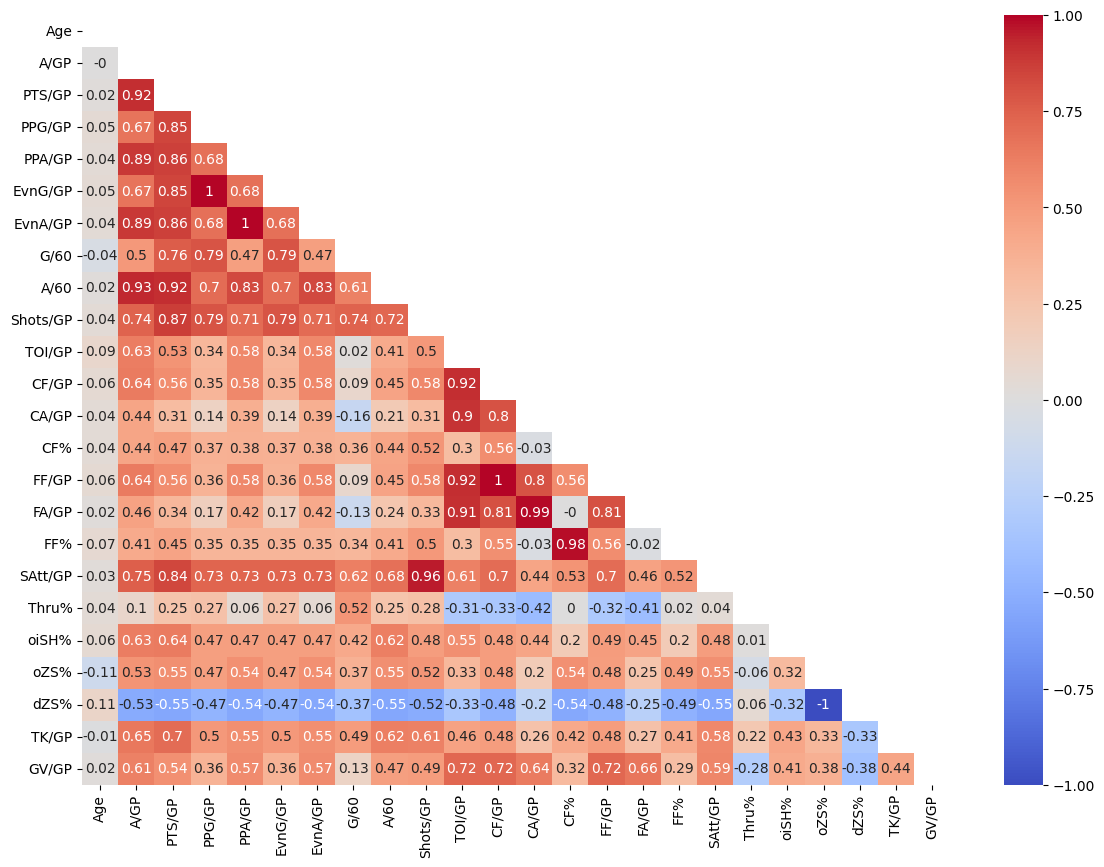

In [32]:
# Calculate all the correlations between each independent variable
import seaborn as sns
corr_df = X.corr()

# Mask for upper-triangular
mask = np.triu(corr_df)

# Visualize with seaborn
plt.figure(figsize=(14,10))
sns.heatmap(corr_df.round(2), annot=True, vmax=1, vmin=-1, center=0, cmap='coolwarm', mask=mask)
plt.show()